In [1]:
import numpy as np
import matplotlib.pyplot as plt

### gumbel distribution

https://en.wikipedia.org/wiki/Gumbel_distribution

- PDF
$$
f(x) = \frac{1}{\beta} \exp(-(\frac{x-\mu}{\beta} + \exp(-\frac{x-\mu}{\beta})))
$$

- CDF
$$
F(x) = \exp(-\exp(-\frac{x-\mu}{\beta}))
$$

- inverse CDF

将 CDF 中的 x, y 互换

$$
F'(x) = -\log(-\log(\frac{x-\mu}{\beta}))
$$


In [2]:
def gumbel_pdf(x, mu=0., beta=1.):
  x = (x - mu) / beta
  return np.exp(-(x+np.exp(-x))) / beta

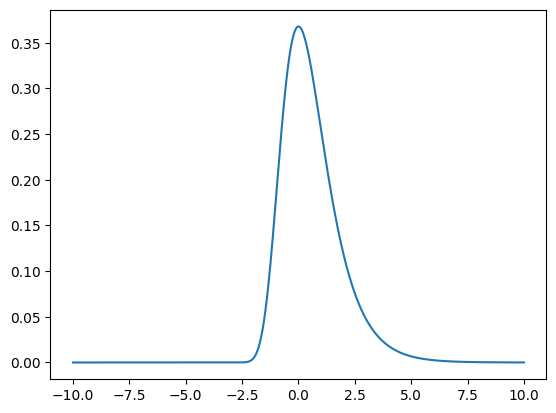

In [3]:
x = np.arange(-10, 10, 0.001)
y = gumbel_pdf(x, 0, 1)
plt.plot(x, y)
plt.show()

#### 主要用于描述随机变量极值的分布

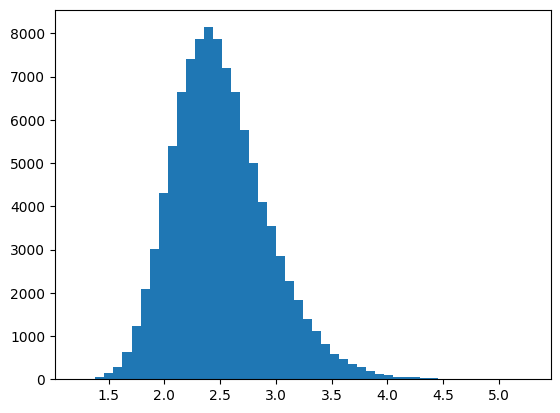

In [4]:
data = np.random.normal(0, 1, (100, 100000))
plt.hist(data.max(0), bins=50)
plt.show()

#### gumbel 分布随机变量

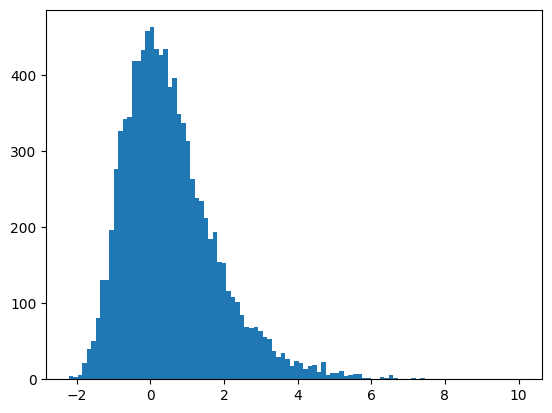

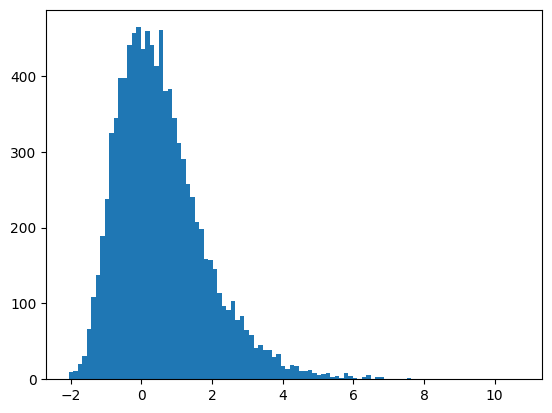

In [5]:
def gumbel_numpy_sample(N=(10000,)):
  # 基于 numpy 生成 gumbel 随机变量
  return np.random.gumbel(size=N)

def gumbel_inverse_sample(N=(10000,)):
  # 基于逆采样生成 gumbel 随机变量
  u = np.random.uniform(0, 1, size=N)
  invert_cdf = lambda x: -np.log(-np.log(x))
  return invert_cdf(u)

samples = gumbel_numpy_sample()
plt.hist(samples, bins=100)
plt.show()
samples = gumbel_inverse_sample()
plt.hist(samples, bins=100)
plt.show()

### 应用：离散分布采样

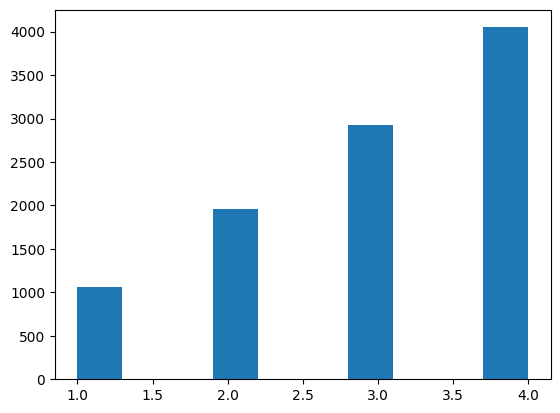

In [6]:
# 常规离散分布采样（不可导）
N = 10000
v = np.array([1, 2, 3, 4])
p = np.array([0.1, 0.2, 0.3, 0.4])
samples = np.random.choice(v, p=p, size=N, replace=True)
plt.hist(samples)
plt.show()

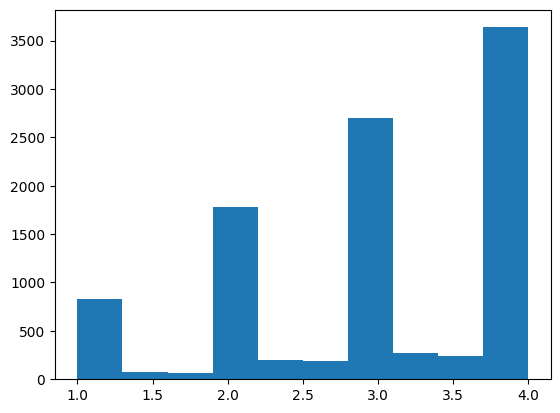

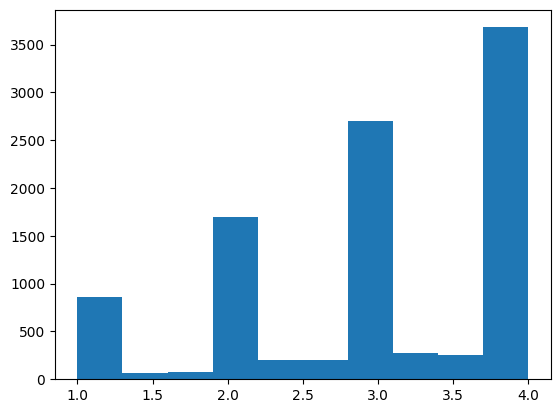

In [34]:
# gumbel softmax trick 采样（可导）
def softmax(x, tau=1.0):
  return np.exp(x/tau) / np.exp(x/tau).sum(axis=-1, keepdims=True)

samples = []
for i in range(N):
  sample = (softmax(np.log(p) + gumbel_numpy_sample(len(p)), tau=0.1) * v).sum()
  samples.append(sample)
plt.hist(samples)
plt.show()

# 向量化实现
samples = (softmax(np.log(p)[None,:] + gumbel_numpy_sample((N, len(p))), tau=0.1) * v[None,:]).sum(1)
plt.hist(samples)
plt.show()